In [1]:
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy as sp
import scipy.linalg
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
sys.path.append('../')
import model
import cost
from iLQR import iLQR
from scipy.integrate import solve_ivp

In [9]:
x_t = np.zeros(3)
x_t[0] = 0.0
x_t[1] = 2.0
x_t[2] = 0.0
ix = 3
iu = 2
N = 500
delT = 0.1
myModel = model.unicycle('Hello',ix,iu,delT)
myCost = cost.unicycle('Hello',x_t,N)

In [10]:
maxIter= 100

x0 = np.zeros(3)
x0[0] = -1.0 # -2.0
x0[1] = 0.0 # -0.5
x0[2] = np.pi/2

u0 = np.ones((N,iu))
i1 = iLQR('unicycle',N,maxIter,myModel,myCost)
x, u, Quu_save, Quu_inv_save, L, l = i1.update(x0,u0)

iteration   cost        reduction   expected    gradient    log10(lambda)
0           2814.58     924         980         0.804       0.0         
1           1891        865         958         0.956       -0.2        
2           1025.59     486         532         0.719       -0.6        
3           539.355     292         307         0.539       -1.2        
4           247.146     105         111         0.357       -2.0        
5           141.761     1.81        73.4        0.281       -3.1        
6           139.949     103         111         0.327       -4.3        
7           37.4427     20.3        19.3        0.219       -5.7        
8           17.1695     10.1        12.3        0.157       -7.3        
9           7.07187     2.91        2.95        0.0834      -inf        
10          4.16181     0.108       0.108       0.0167      -inf        


../iLQR.py:302: RuntimeWarning: divide by zero encountered in log10
  print("%-12d%-12.6g%-12.3g%-12.3g%-12.3g%-12.1f" % ( iteration,np.sum(self.c),dcost,expected,g_norm,np.log10(self.lamda)) )


11          4.0541      0.00291     0.00282     0.00246     -inf        
12          4.05119     0.000104    9.91e-05    0.000478    -inf        
13          4.05109     4.89e-06    4.8e-06     0.000115    -inf        
SUCCEESS : gradient norm < tolGrad


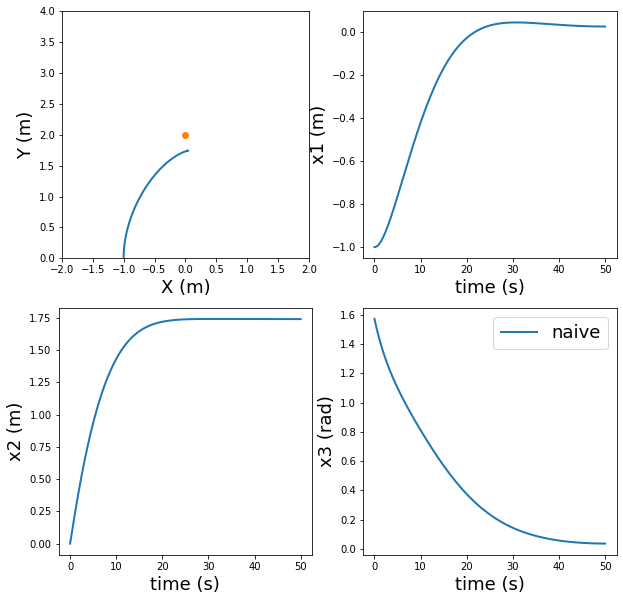

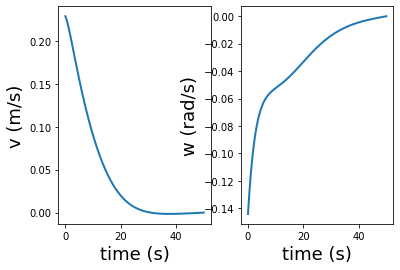

In [11]:
plt.figure(figsize=(10,10))
fS = 18
plt.subplot(221)
plt.plot(x[:,0], x[:,1], linewidth=2.0)
plt.plot(x_t[0],x_t[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-2, 2, 0, 4.0])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)
plt.subplot(222)
plt.plot(np.array(range(N+1))*0.1, x[:,0], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x1 (m)', fontsize = fS)
plt.subplot(223)
plt.plot(np.array(range(N+1))*0.1, x[:,1], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x2 (m)', fontsize = fS)
plt.subplot(224)
plt.plot(np.array(range(N+1))*0.1, x[:,2], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x3 (rad)', fontsize = fS)
plt.legend(fontsize=fS)
plt.show()

plt.figure()
plt.subplot(121)
plt.plot(np.array(range(N))*0.1, u[:,0], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('v (m/s)', fontsize = fS)
plt.subplot(122)
plt.plot(np.array(range(N))*0.1, u[:,1], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('w (rad/s)', fontsize = fS)
plt.show()



# Test integration

In [ ]:
x_test = np.zeros_like(x)

In [ ]:
# using for loop
x_test[0,:] = x[0,:]
state_init = x[0,:]
start = time.time()
for i in range(N) :
    state_init = x_test[i,:]
    int_result = solve_ivp(lambda t,x: myModel.forwardDyn(x,u[i,:],idx=t,discrete=False),
                          t_span=(0,0.1),y0=state_init,max_step=1e-2)
    x_test[i+1,:] = int_result.y[:,-1]
print(time.time()-start)

In [ ]:

# parallel integration
def input_by_time(u,t,t_final) :
    if t >= t_final :
        return u[-1,:]
    else :
        return u[int(t*10),:]
t_eval = np.array(range(N+1))*0.1
state_init = x[0,:]
start = time.time()
int_result = solve_ivp(lambda t,x: myModel.forwardDyn(x,input_by_time(u,t,50),idx=t,discrete=False),
                      t_span=(t_eval[0],t_eval[-1]),
                       t_eval = t_eval,
                       y0=state_init,
                       max_step=1e-2,
                      )
x_test_p = int_result.y.transpose()
print(time.time()-start)

In [ ]:
%matplotlib qt
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(np.array(range(N+1))*0.1, x[:,0], linewidth=2.0,label='naive')
plt.plot(np.array(range(N+1))*0.1, x_test[:,0], linewidth=2.0,label='ode')
plt.plot(np.array(range(N+1))*0.1, x_test_p[:,0], linewidth=2.0,label='ode_parallel')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x1 (m)', fontsize = fS)
plt.subplot(132)
plt.plot(np.array(range(N+1))*0.1, x[:,1], linewidth=2.0,label='naive')
plt.plot(np.array(range(N+1))*0.1, x_test[:,1], linewidth=2.0,label='ode')
plt.plot(np.array(range(N+1))*0.1, x_test_p[:,1], linewidth=2.0,label='ode_parallel')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x2 (m)', fontsize = fS)
plt.subplot(133)
plt.plot(np.array(range(N+1))*0.1, x[:,2], linewidth=2.0,label='naive')
plt.plot(np.array(range(N+1))*0.1, x_test[:,2], linewidth=2.0,label='ode')
# plt.plot(np.array(range(N+1))*0.1, x_test_p[:,2], linewidth=2.0,label='ode_parallel')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x3 (rad)', fontsize = fS)
plt.legend(fontsize=fS)
plt.show()